/Users/apple/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/apple/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


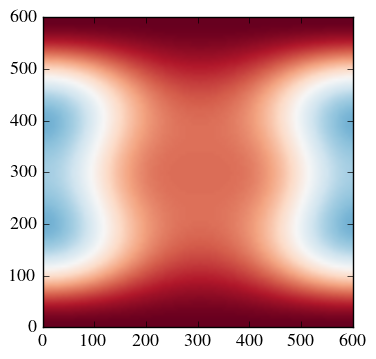

In [1]:
#total purcell factor TM+TE x-polarization tra 30
import numpy as np

mu0,ep0 = 4*np.pi*1e-7,8.8541878176*1e-12 #air
mu1,ep1 = mu0*1,ep0*1 #air
mu2,ep2 = mu0*1,ep0*1 #air
mu3,ep3 = mu0*1,ep0*(-3.8804206403147354+1j*2.624799199999999) #Au
n1,n2,n3 = ((mu1*ep1)/(mu0*ep0))**0.5,((mu2*ep2)/(mu0*ep0))**0.5,((mu3*ep3)/(mu0*ep0))**0.5 #refractive index

lamda0 = 520 #m
c = 3*1e8 #m/s
w = (c/(lamda0))*2*np.pi #angular freq
k0 = 2*np.pi/(lamda0) #wavenumber in free space
k1,k2,k3= n1*k0,n2*k0,n3*k0
p = (5*1e-7)*(lamda0)/(2*np.pi*c) #dipole moment
a,b = 600,600 #m waveguide geometry
d = 25 #m dipole position


def calFptra(xd,yd,d):
    ffm_eva,ffm_tra,ffe_eva,ffe_tra = 0,0,0,0
#TM    
    for m in range(1,10):       
        for n in range(1,10):
            kt = ((m*np.pi/a)**2+(n*np.pi/b)**2)**0.5
            k1z,k2z,k3z = (k1**2-kt**2)**0.5,(k2**2-kt**2)**0.5,(k3**2-kt**2)**0.5
            rtm = (ep2*k3z-ep3*k2z)/(ep2*k3z+ep3*k2z)
            tmfactor = (1/kt)*(m*np.pi/a)*(k1z/k1)**0.5*np.cos(m*np.pi*xd/a)*np.sin(n*np.pi*yd/b)
            
            Fpm = ((12*np.pi*ep0)/(a*b*k0**3))*(mu1/ep1)**0.5*(1j*w)*(rtm*np.exp(1j*2*k1z*d)+1)*tmfactor**2
            if kt>k1:
                ffm_eva = ffm_eva+(Fpm).imag
            else:
                ffm_tra = ffm_tra+(Fpm).imag        
#TE    
    for m in range(0,10):      
        for n in range(1,10):
            kt = ((m*np.pi/a)**2+(n*np.pi/b)**2)**0.5
            k1z,k2z,k3z = (k1**2-kt**2)**0.5,(k2**2-kt**2)**0.5,(k3**2-kt**2)**0.5
            rte = (mu3*k2z-mu2*k3z)/(mu3*k2z+mu2*k3z)
            tefactor = (1/kt)*(n*np.pi/b)*(k1z/k1)**0.5*np.cos(m*np.pi*xd/a)*np.sin(n*np.pi*yd/b)
            
            Fpe = ((12*np.pi*ep0)/(a*b*k0**3))*(mu1/ep1)**0.5*(1j*w)*(rte*np.exp(1j*2*k1z*d)+1)*tefactor**2
            if kt>k1:
                ffe_eva = ffe_eva+(Fpe).imag
            else:
                ffe_tra = ffe_tra+(Fpe).imag
    
    return  (ffe_tra+ffm_tra)

#-------------------------------------------------
#change number fonts
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
xd = np.arange(0,600, 6)
yd = np.arange(0,600, 6)
X,Y = np.meshgrid(xd, yd)
Z = calFptra(X,Y,d) 

im = plt.imshow(Z, cmap=plt.cm.RdBu, extent=(0, 600,0,600),animated=True)  
cset = plt.contour(Z, np.arange(0, 1, 0.2), linewidths=0,cmap=plt.cm.RdBu,extent=(0, 600,0,600))

plt.tick_params(axis='x', labelsize=13) #tick number size
plt.tick_params(axis='y', labelsize=13)

def updatefig(*args):
    global d
    xd = np.arange(0,600, 6)
    yd = np.arange(0,600, 6)
    X,Y = np.meshgrid(xd, yd)
    d += 5
    im.set_array(calFptra(X,Y,d))
    return im,
ani = animation.FuncAnimation(fig, updatefig, interval=20, blit=True)
ani.save('basic.mp4', fps=30)

plt.show()